# Fruit Classification Using SVM & KNN

### Import Some Importent Libararies

In [1]:
import numpy as np
import cv2
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import glob
import os
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score



# SET DataSet Paths

In [2]:
folder_data = 'fruits/'
folder_train = folder_data + 'Training/'
folder_test = folder_data + 'Test/'
folder_multiple = folder_data + 'test-multiple_fruits/'
random_testing_images =  folder_data + 'random_testing_images/'
os.listdir(folder_data)

['Random', 'random_testing_images', 'Test', 'Training']

# Load Training Dataset

In [3]:
SIZE = 48

fruit_images = []
labels = [] 
for fruit_dir_path in glob.glob(folder_train + '*'):    
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (SIZE, SIZE))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        fruit_images.append(image)
        labels.append(fruit_dir_path.split("/")[-1].split('\\')[-1])
                      
fruit_images = np.array(fruit_images)
labels = np.array(labels)
print(fruit_images.shape, labels.shape)

(12249, 48, 48, 3) (12249,)


# Show Classes Of Data SET

In [4]:
label_to_id_dict = {v:i for i,v in enumerate(np.unique(labels))}
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}

label_ids = np.array([label_to_id_dict[x] for x in labels])

id_to_label_dict

{0: 'Apple Braeburn',
 1: 'Apple Crimson Snow',
 2: 'Apricot',
 3: 'Avocado',
 4: 'Banana',
 5: 'Beetroot',
 6: 'Blueberry',
 7: 'Cactus fruit',
 8: 'Cocos',
 9: 'Dates',
 10: 'Eggplant',
 11: 'Guava',
 12: 'Hazelnut',
 13: 'Huckleberry',
 14: 'Kiwi',
 15: 'Lemon',
 16: 'Mango',
 17: 'Mulberry',
 18: 'Orange',
 19: 'Papaya',
 20: 'Pear',
 21: 'Pineapple',
 22: 'Quince',
 23: 'Strawberry',
 24: 'Walnut'}

# Plot Some Images OF Data Set

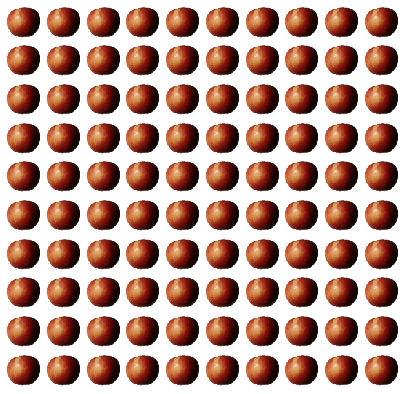

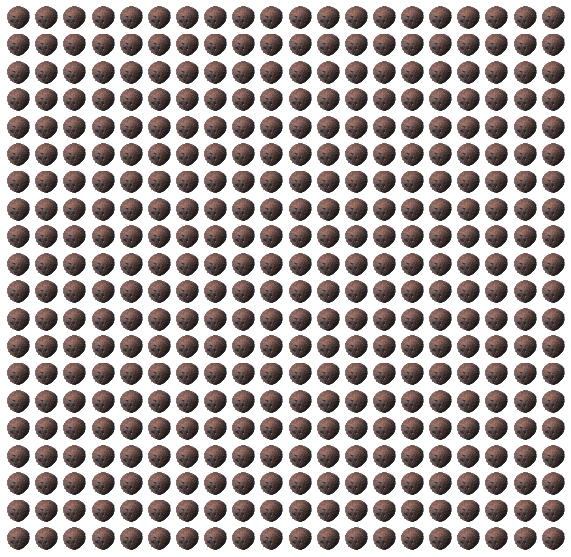

In [5]:
def plot_image_grid(images, nb_rows, nb_cols, figsize=(5, 5)):
    assert len(images) == nb_rows*nb_cols, "Number of images should be the same as (nb_rows*nb_cols)"
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=figsize)
    
    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            # axs[i, j].xaxis.set_ticklabels([])
            # axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].axis('off')
            axs[i, j].imshow(images[n])
plot_image_grid(fruit_images[0:100], 10, 10, figsize=(7,7))
plot_image_grid(fruit_images[4000:4400], 20, 20, figsize=(10,10))


# EXtraction OF Features Using PCA
#### PCA give better feature than other techniques

In [6]:
scaler = StandardScaler()
images_scaled = scaler.fit_transform([i.flatten() for i in fruit_images])
pca = PCA(n_components=50)
pca_result = pca.fit_transform(images_scaled)


# Show Images after apply PCA

In [7]:
tsne = TSNE(n_components=2, perplexity=40.0)
tsne_result = tsne.fit_transform(pca_result)
tsne_result_scaled = StandardScaler().fit_transform(tsne_result)

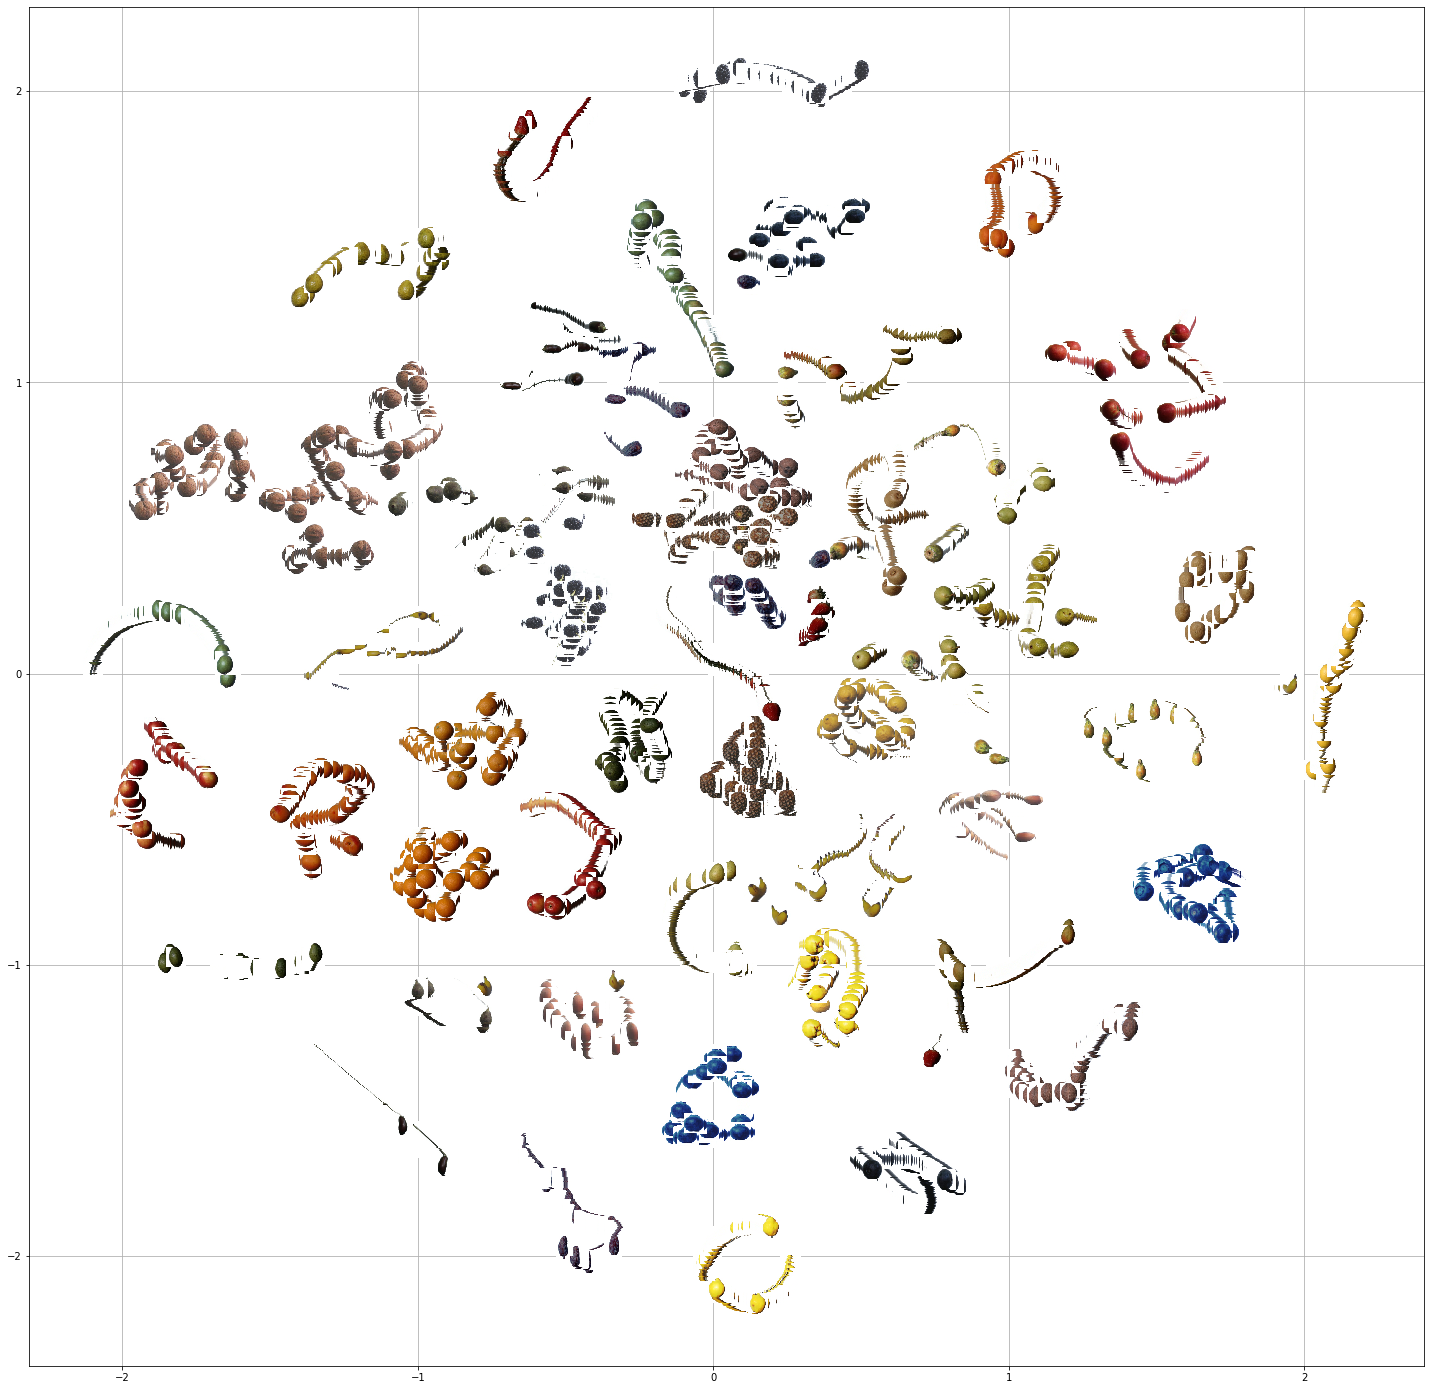

In [8]:
def visualize_scatter_with_images(data_2d, images, figsize=(45,45), image_zoom=1):
    fig, ax = plt.subplots(figsize=figsize)
    plt.grid()
    artists = []
    for xy, i in zip(data_2d, images):
        x0, y0 = xy
        img = OffsetImage(i, zoom=image_zoom)
        ab = AnnotationBbox(img, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(data_2d)
    ax.autoscale()
    plt.show()
visualize_scatter_with_images(tsne_result_scaled, fruit_images, image_zoom=0.4, figsize=(25, 25))

# Split Traing data after aplying PCA

In [9]:
X_train, X_test, y_train, y_test = train_test_split(pca_result, label_ids, test_size=0.10, random_state=42)

# Train SVM Classifier With RBF Kernal

In [10]:

svm_clf = svm.SVC()
svm_clf = svm_clf.fit(X_train, y_train) 


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Check Accuracy of SVM Classifer

In [11]:
test_predictions = svm_clf.predict(X_test)
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with SVM: {0:.6f}".format(precision))

Accuracy with SVM: 94.204082


# Load Testing Data To Validate The Model

In [12]:
test_fruit_images = []
test_labels = [] 
for fruit_dir_path in glob.glob(folder_test + "*"):
    fruit_label = fruit_dir_path.split("/")[-1].split('\\')[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        
        image = cv2.resize(image, (SIZE, SIZE))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        test_fruit_images.append(image)
        test_labels.append(fruit_label)
test_fruit_images = np.array(test_fruit_images)
test_labels = np.array(test_labels)

test_label_ids = np.array([label_to_id_dict[x] for x in test_labels])

print(test_fruit_images.shape, test_labels.shape)
test_label_ids = np.array([label_to_id_dict[x] for x in test_labels])
test_images_scaled = scaler.transform([i.flatten() for i in test_fruit_images])
test_pca_result = pca.transform(test_images_scaled)

(4115, 48, 48, 3) (4115,)


# Validation Accuracy & F1 Score with SVM

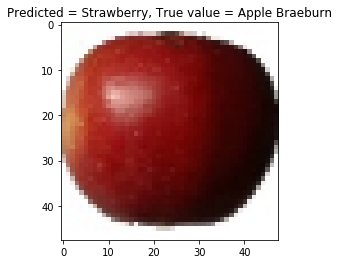

In [13]:
n = 20
predict = id_to_label_dict[np.asscalar(svm_clf.predict(test_pca_result[n].reshape(1,-1)))]
truth = id_to_label_dict[test_label_ids[n]]

plt.imshow(test_fruit_images[n])
plt.title('Predicted = {}, True value = {}'.format(predict, truth))
plt.show()

In [14]:
test_predictions = svm_clf.predict(test_pca_result)
precision = accuracy_score(test_predictions, test_label_ids) * 100
print("Validation Accuracy with SVM: {0:.6f}".format(precision))
f1 = f1_score(test_predictions, test_label_ids , average='macro') * 100
print("\nF1 score with Validation: {0:.6f}".format(f1))

Validation Accuracy with SVM: 51.008505

F1 score with Validation: 60.786140


# Confusion Matrix & Classification Report On Validation Data With SVM

In [15]:
print(confusion_matrix(test_label_ids,test_predictions ))
print(classification_report(test_label_ids,test_predictions))

[[ 37   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0 127   0]
 [  0  30   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0 118   0]
 [  0   0  38   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0 126   0]
 [  0   0   0  77   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0  66   0]
 [  0   0   0   0 107   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0  59   0]
 [  0   0   0   0   0  43   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0 107   0]
 [  0   0   0   0   0   0  95   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0  59   0]
 [  0   0   0   0   0   0   0 124   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0  42   0]
 [  0   0   0   0   0   0   0   0  68   0   0   0   0   0   0   0   0   0
    0   0   0   0   0  98   0]
 [  0   0   0   0   0   0   0   0   0  89   0   0   0  

# Train KNN with Diffrent K Values 

In [16]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

# Generate Plot Of KNN with Diffrent K Values

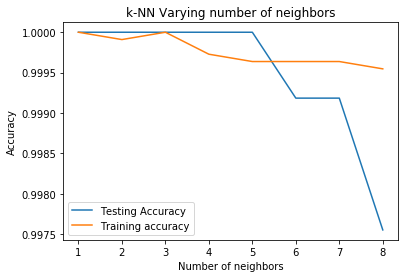

In [17]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

## Note
#### Above Graph Show that KNN perform best with K=3 in Our Case

# Train KNN Classifier With K=3

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
import warnings
warnings.filterwarnings('ignore')

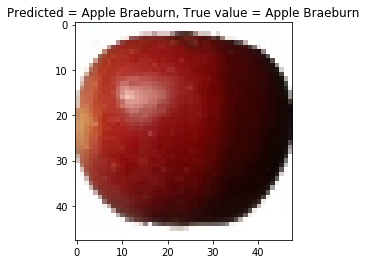

In [19]:
n = 20
predict = id_to_label_dict[np.asscalar(knn.predict(test_pca_result[n].reshape(1,-1)))]
truth = id_to_label_dict[test_label_ids[n]]

plt.imshow(test_fruit_images[n])
plt.title('Predicted = {}, True value = {}'.format(predict, truth))
plt.show()

# Check Accuracy of KNN Classifer

In [20]:
test_predictions = knn.predict(X_test)
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with Knn: {0:.6f}".format(precision))



Accuracy with Knn: 100.000000


# Validation Accuracy & F1 Score with KNN

In [21]:
test_predictions = knn.predict(test_pca_result)
test_precision = accuracy_score(test_predictions, test_label_ids) * 100
print("Validation Accuracy with Knn: {0:.6f}".format(test_precision))
f1 = f1_score(test_predictions, test_label_ids , average='macro') * 100
print("\nF1 score with Validation: {0:.6f}".format(f1))

Validation Accuracy with Knn: 93.317132

F1 score with Validation: 93.072998


# Confusion Matrix & Classification Report On Validation Data With KNN

In [22]:

print(confusion_matrix(test_label_ids,test_predictions ))
print(classification_report(test_label_ids,test_predictions))


[[125   0   0   0   0   0   0   0   0   0   0   0   0   0  16   0   0   0
   23   0   0   0   0   0   0]
 [  0 148   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  3   0 153   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    8   0   0   0   0   0   0]
 [  0   0   0 141   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   2   0   0   0   0   0]
 [  0   0   0   0 124   0   0   9   0   0   0   0  33   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0 142   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   8   0   0   0]
 [  0   0   0   0   0   0 154   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   9   0   0 157   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0  12   0   0 153   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   1]
 [  0   0   0   0   0   0   0   0   0 153  13   0   0  

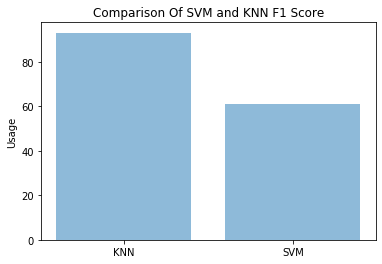

In [23]:
objects = ('KNN', 'SVM')
## KNN F1 score with Validation: 93.099020
## SVM F1 score with Validation: 60.856510

y_pos = np.arange(len(objects))
performance = [93.099020,60.856510]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Comparison Of SVM and KNN F1 Score')

plt.show()

# Load NEW Random Images For Model Testing

In [24]:
test_fruit_images = []
test_labels = [] 
for fruit_dir_path in glob.glob(random_testing_images + "*"):
    #print(fruit_dir_path)
    fruit_label = fruit_dir_path.split("/")[-1].split('\\')[-1]
    #fruit_label = fruit_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        
        image = cv2.resize(image, (SIZE, SIZE))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        test_fruit_images.append(image)
        test_labels.append(fruit_label)
test_fruit_images = np.array(test_fruit_images)
test_labels = np.array(test_labels)

test_label_ids = np.array([label_to_id_dict[x] for x in test_labels])

print(test_fruit_images.shape, test_labels.shape)
test_label_ids = np.array([label_to_id_dict[x] for x in test_labels])


(37, 48, 48, 3) (37,)


## Apply PCA Testing Data

In [25]:
test_images_scaled = scaler.transform([i.flatten() for i in test_fruit_images])
test_pca_result = pca.transform(test_images_scaled)
print(test_pca_result)
projected = pca.inverse_transform(test_pca_result)


[[-6.21338847e+01  3.03801593e+01 -1.65335491e+01 ...  3.01698094e+00
   2.55979376e+00  2.69388054e+00]
 [-6.21658051e+01  2.97455145e+01 -1.62627408e+01 ...  1.91639491e+00
   1.63698589e+00  1.88077916e+00]
 [-9.00666072e+00  2.80178125e+01  7.72016249e+00 ... -1.83115375e+02
   6.39680411e+02  1.08223701e+03]
 ...
 [-9.93927282e+00 -1.44312403e+01  1.94320452e+01 ... -7.69345731e+00
  -1.87309236e+00  2.84154614e+00]
 [-1.20235610e+01 -3.56497738e+00  4.51758732e+01 ...  2.07336971e-01
  -3.30486364e+00  8.10715467e-01]
 [-1.13540011e+01 -3.62267397e+00  4.50130150e+01 ...  3.51644833e-01
  -3.17827451e+00  5.27376380e-01]]


## Plot Features Of Random Test Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

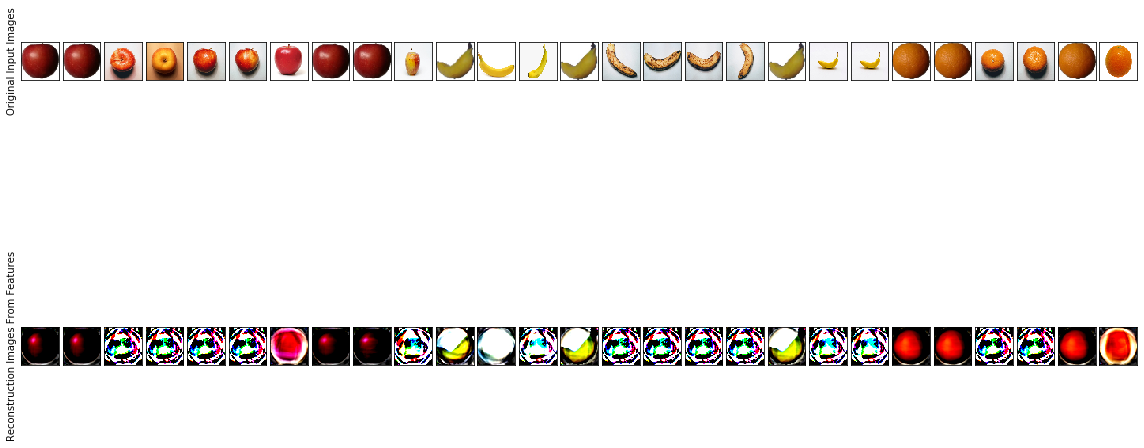

In [26]:
# Plot the results
fig, ax = plt.subplots(2, len(test_fruit_images)-10, figsize=(20,10),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(len(test_fruit_images)-10):
    #print(test_fruit_images[i].shape)
    ax[0, i].imshow(test_fruit_images[i], cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(48, 48,3), cmap='binary_r')
    
ax[0, 0].set_ylabel('Original Input Images')
ax[1, 0].set_ylabel('Reconstruction Images From Features');

The top row here shows the input images, while the bottom row shows the reconstruction of the images from just 150 of the ~3,000 initial features. This visualization makes clear why the PCA feature selection used in In-Depth: Support Vector Machines was so successful: although it reduces the dimensionality of the data by nearly a factor of 20, the projected images contain enough information that we might, by eye, recognize the individuals in the image. What this means is that our classification algorithm needs to be trained on 150-dimensional data rather than 3,000-dimensional data, which depending on the particular algorithm we choose, can lead to a much more efficient classification.

## Show Predictions With Random Images using SVM

Apple Braeburn


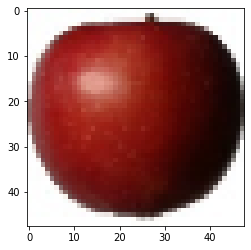

Apple Braeburn


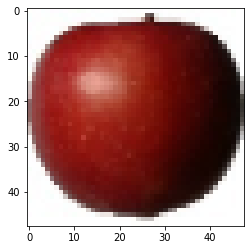

Strawberry


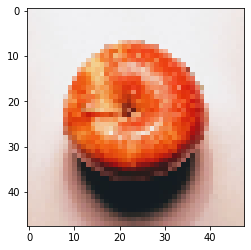

Strawberry


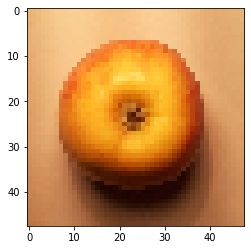

Strawberry


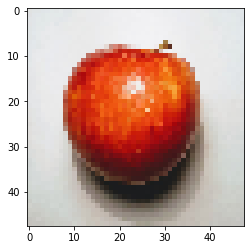

Strawberry


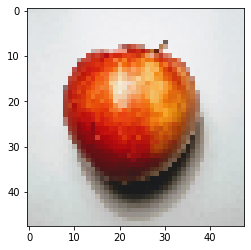

Strawberry


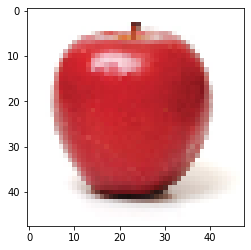

Strawberry


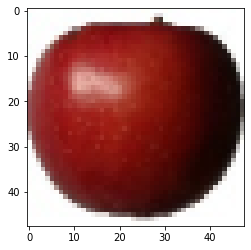

Strawberry


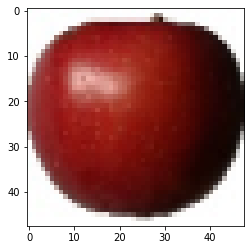

Strawberry


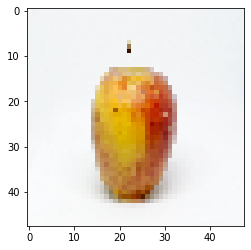

Banana


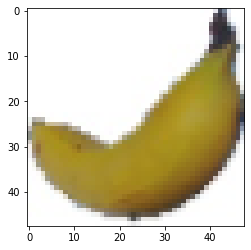

Strawberry


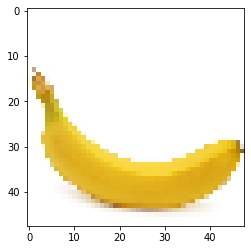

Strawberry


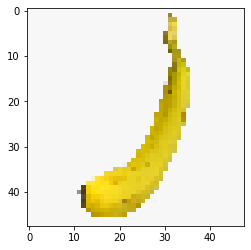

Banana


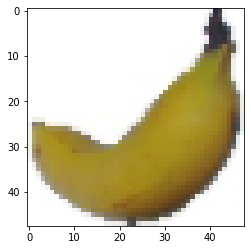

Strawberry


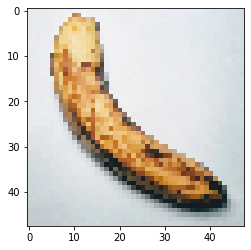

Strawberry


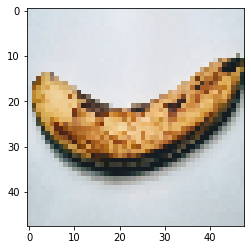

Strawberry


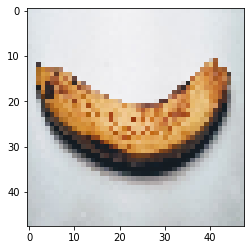

Strawberry


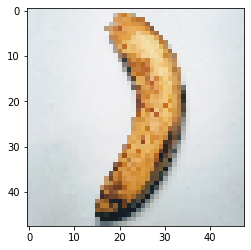

Banana


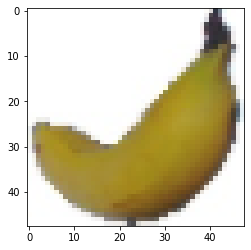

Strawberry


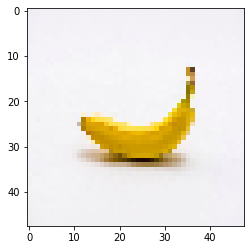

Strawberry


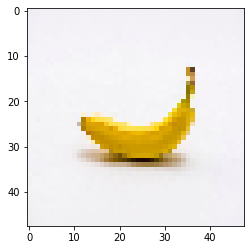

Orange


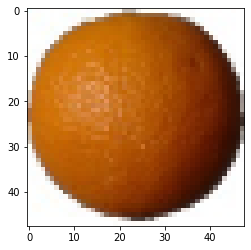

Orange


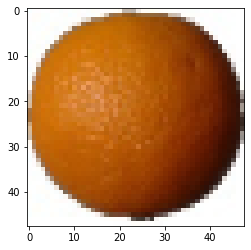

Strawberry


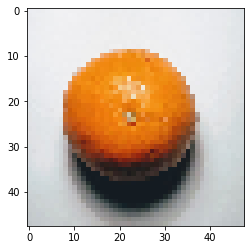

Strawberry


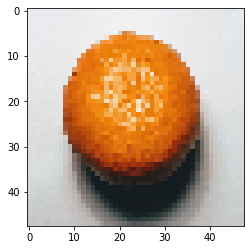

Orange


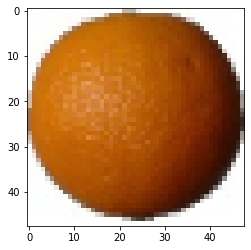

Strawberry


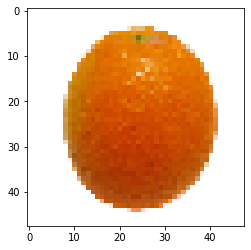

Orange


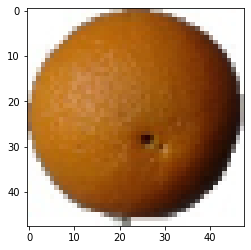

Orange


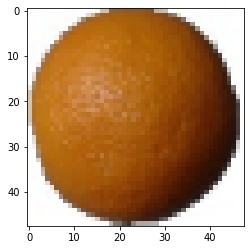

Orange


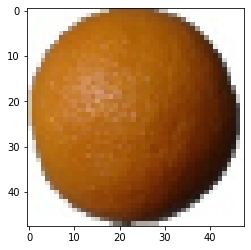

Orange


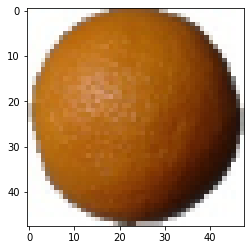

Orange


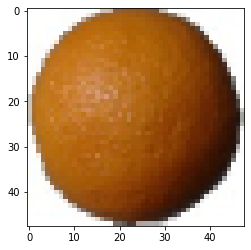

Strawberry


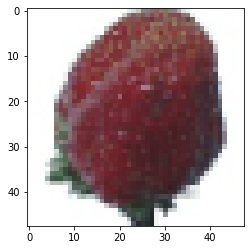

Strawberry


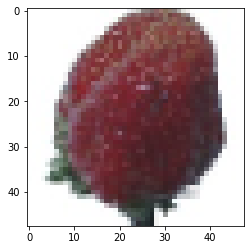

Strawberry


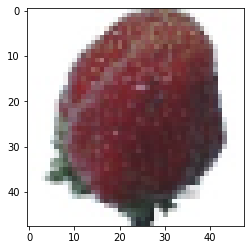

Strawberry


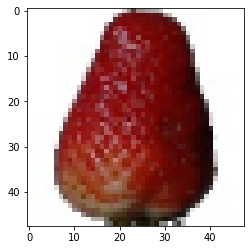

Strawberry


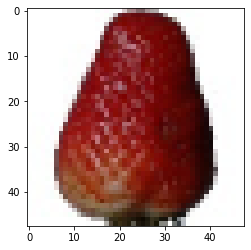

In [27]:

for i in range (len(test_fruit_images)):
    predict = id_to_label_dict[np.asscalar(svm_clf.predict(test_pca_result[i].reshape(1,-1)))]
    print(predict)
    plt.imshow(test_fruit_images[i])
    plt.show()

## Show Predictions With Random Images using KNN

Apple Braeburn


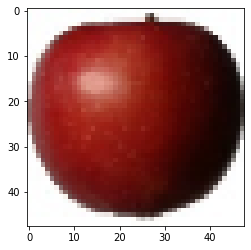

Apple Braeburn


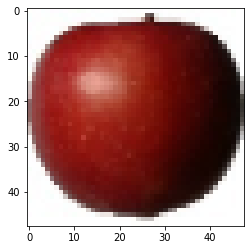

Strawberry


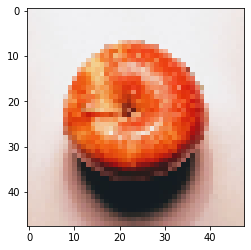

Strawberry


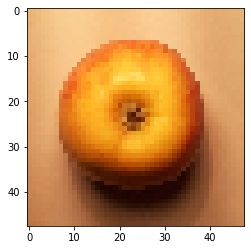

Strawberry


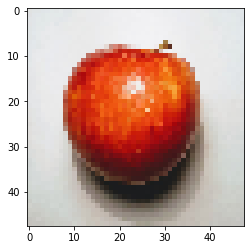

Strawberry


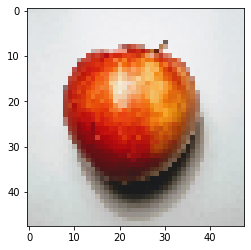

Hazelnut


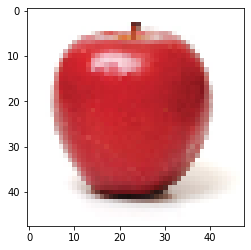

Apple Braeburn


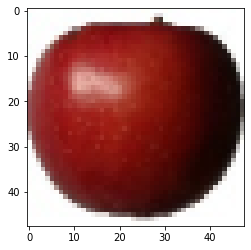

Apple Braeburn


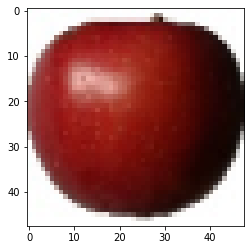

Mulberry


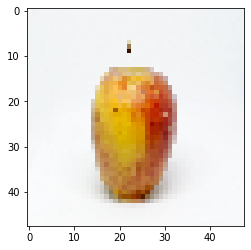

Banana


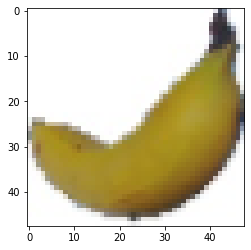

Banana


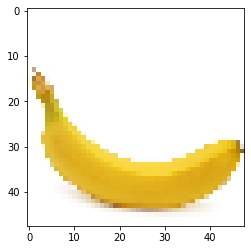

Mulberry


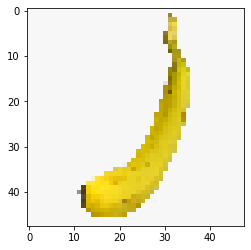

Banana


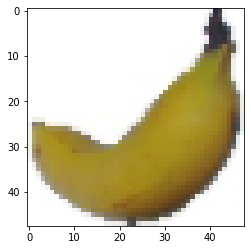

Strawberry


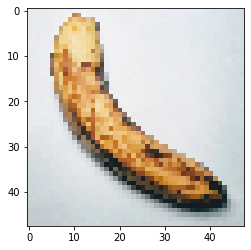

Strawberry


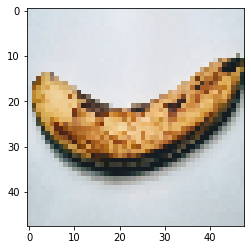

Strawberry


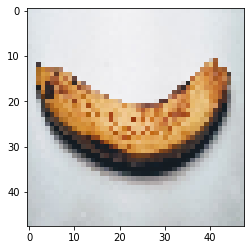

Strawberry


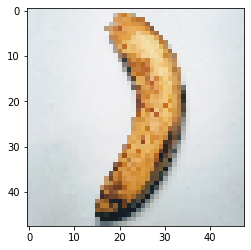

Banana


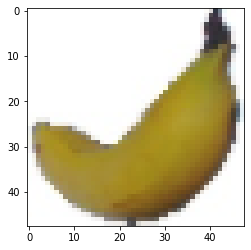

Strawberry


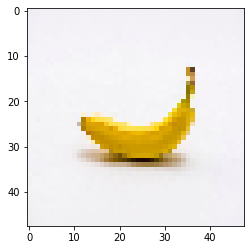

Strawberry


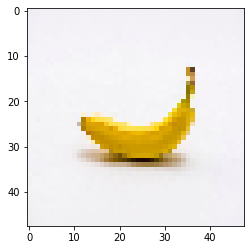

Orange


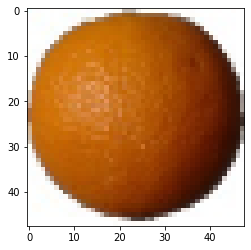

Orange


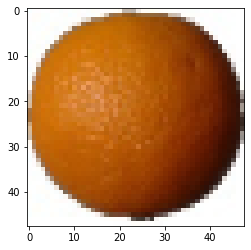

Strawberry


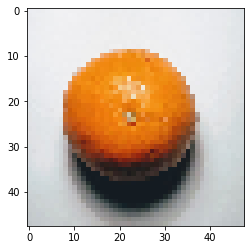

Strawberry


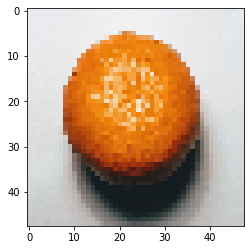

Orange


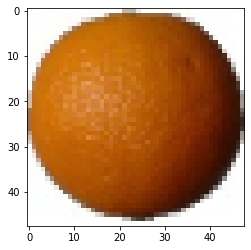

Papaya


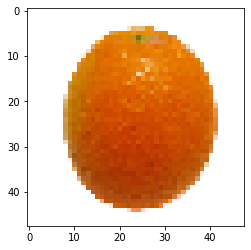

Orange


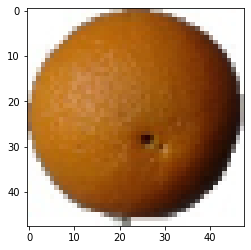

Orange


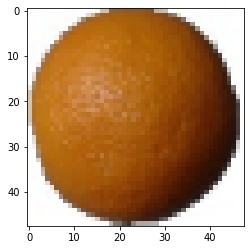

Orange


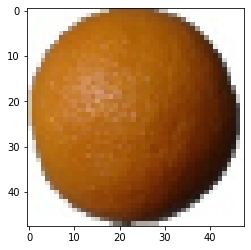

Orange


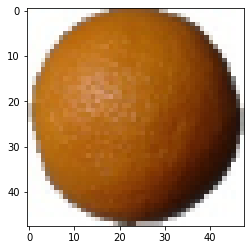

Orange


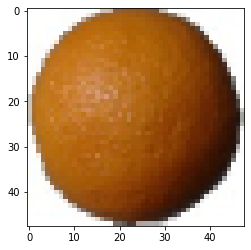

Cocos


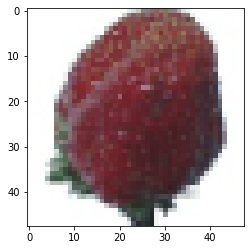

Cocos


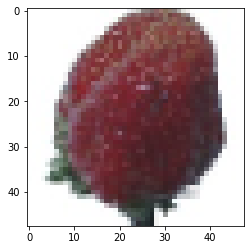

Cocos


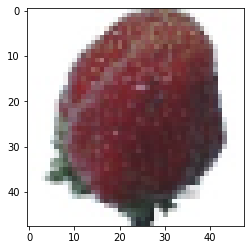

Strawberry


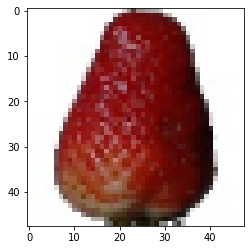

Strawberry


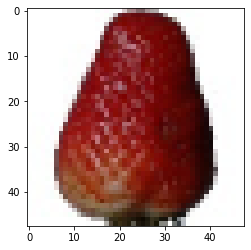

In [28]:
for i in range (len(test_fruit_images)):
    predict = id_to_label_dict[np.asscalar(knn.predict(test_pca_result[i].reshape(1,-1)))]
    print(predict)
    plt.imshow(test_fruit_images[i])
    plt.show()